In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("flights2019_2023.csv")
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [77]:
df.shape

(3000000, 32)

In [78]:
df.dtypes

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

Unnecessary columns
* AIRLINE_DOT (redundant)
* AIRLINE_CODE (redundant)
* DOT_CODE (unique value)
* FL_NUMBER (unique value)
* CRS_DEP_TIME (redundant and in local time, using DEP_DELAY instead)
* DEP_TIME (redundant and in local time, using DEP_DELAY instead)
* WHEELS_OFF (redundant and in local time, using TAXI_OUT instead)
* WHEELS_ON (rendundant and in local time, using TAXI_IN instead)
* CRS_ARR_TIME (redundant and in local time, using ARR_DELAY instead)
* ARR_TIME (redundant and in local time, using ARR_DELAY instead)

Explore difference between CRS flight time, elapsed fight time, and flight time

In [79]:
cleaned_df = pd.DataFrame(df[["FL_DATE", "AIRLINE", "ORIGIN", "ORIGIN_CITY", "DEST", "DEST_CITY", "DEP_DELAY", "TAXI_OUT", "TAXI_IN",
                               "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED", "CRS_ELAPSED_TIME", "ELAPSED_TIME", "AIR_TIME",
                               "DISTANCE", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS", "DELAY_DUE_SECURITY",
                               "DELAY_DUE_LATE_AIRCRAFT"]])
cleaned_df

,FL_DATE,AIRLINE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",-4.0,19.0,4.0,-14.0,...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,MSP,"Minneapolis, MN",SEA,"Seattle, WA",-6.0,9.0,38.0,-5.0,...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,DEN,"Denver, CO",MSP,"Minneapolis, MN",6.0,20.0,5.0,0.0,...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",-1.0,27.0,9.0,24.0,...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",-2.0,15.0,14.0,-1.0,...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",-2.0,10.0,6.0,-16.0,...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,ORD,"Chicago, IL",AUS,"Austin, TX",-6.0,10.0,5.0,-37.0,...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,HSV,"Huntsville, AL",ATL,"Atlanta, GA",41.0,16.0,6.0,36.0,...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,BOS,"Boston, MA",LGA,"New York, NY",-5.0,19.0,8.0,-16.0,...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [80]:
cleaned_df.shape

(3000000, 22)

In [81]:
print(cleaned_df.isnull().sum())

FL_DATE                          0
AIRLINE                          0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
DEP_DELAY                    77644
TAXI_OUT                     78806
TAXI_IN                      79944
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER          2466137
DELAY_DUE_NAS              2466137
DELAY_DUE_SECURITY         2466137
DELAY_DUE_LATE_AIRCRAFT    2466137
dtype: int64


<Axes: >

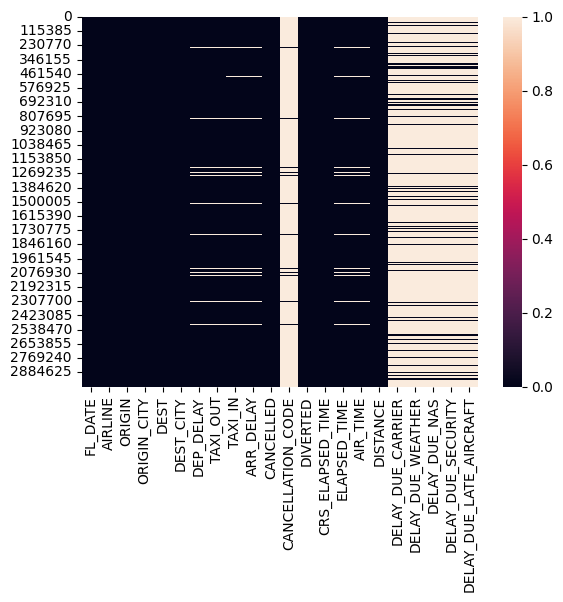

In [82]:
sns.heatmap(data=cleaned_df.isnull())

Missing values in cancelation code and delay causes are probably because there was no delays so we can replace them with zeros. Other missing values seem to be from the flight being cancelled

In [83]:
# cleaned_df.dropna(subset=["DEP_DELAY", "CRS_ELAPSED_TIME", "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "ELAPSED_TIME", "AIR_TIME"], axis=0)

In [84]:
cleaned_df["CANCELLATION_CODE"] = cleaned_df["CANCELLATION_CODE"].fillna("not cancelled")
cleaned_df["DELAY_DUE_CARRIER"] = cleaned_df["DELAY_DUE_CARRIER"].fillna(0)
cleaned_df["DELAY_DUE_WEATHER"] = cleaned_df["DELAY_DUE_WEATHER"].fillna(0)
cleaned_df["DELAY_DUE_NAS"] = cleaned_df["DELAY_DUE_NAS"].fillna(0)
cleaned_df["DELAY_DUE_SECURITY"] = cleaned_df["DELAY_DUE_SECURITY"].fillna(0)
cleaned_df["DELAY_DUE_LATE_AIRCRAFT"] = cleaned_df["DELAY_DUE_LATE_AIRCRAFT"].fillna(0)

<Axes: xlabel='count', ylabel='AIRLINE'>

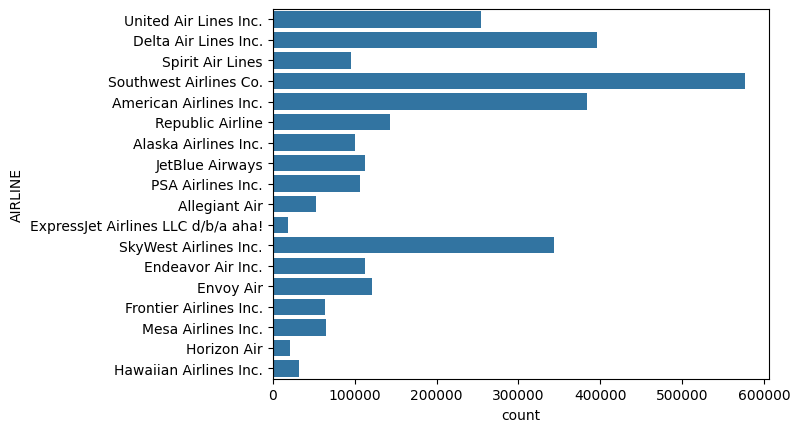

In [85]:
sns.countplot(data=cleaned_df["AIRLINE"])

In [86]:
cleaned_df["ORIGIN"].value_counts()

ORIGIN
ATL    153556
DFW    130334
ORD    122296
DEN    119919
CLT     94304
        ...  
ART        21
OGD        18
ILG        17
FLO         8
IPT         6
Name: count, Length: 380, dtype: int64

In [87]:
cleaned_df["DEST"].value_counts()

DEST
ATL    153569
DFW    129770
ORD    123334
DEN    119592
CLT     95413
        ...  
BFM        24
FLO        17
CDB        17
ILG        13
IPT        11
Name: count, Length: 380, dtype: int64

In [88]:
print(cleaned_df["CANCELLED"].value_counts())
print("\n")
print(cleaned_df["DIVERTED"].value_counts())

CANCELLED
0.0    2920860
1.0      79140
Name: count, dtype: int64


DIVERTED
0.0    2992944
1.0       7056
Name: count, dtype: int64


In [89]:
# making CANCELLED and DIVERTED ints because there's only two values and no reason for it to be a float
cleaned_df["CANCELLED"]= cleaned_df["CANCELLED"].astype(int)
print(cleaned_df["CANCELLED"].value_counts())
cleaned_df["DIVERTED"] = cleaned_df["DIVERTED"].astype(int)
print("\n")
print(cleaned_df["DIVERTED"].value_counts())


CANCELLED
0    2920860
1      79140
Name: count, dtype: int64


DIVERTED
0    2992944
1       7056
Name: count, dtype: int64


In [90]:
cleaned_df["ORIGIN_CITY"].value_counts()

ORIGIN_CITY
Chicago, IL              157368
Atlanta, GA              153556
Dallas/Fort Worth, TX    130334
Denver, CO               119919
New York, NY             113040
                          ...  
Watertown, NY                21
Ogden, UT                    18
Wilmington, DE               17
Florence, SC                  8
Williamsport, PA              6
Name: count, Length: 373, dtype: int64

In [91]:
cleaned_df["ORIGIN"].value_counts()

ORIGIN
ATL    153556
DFW    130334
ORD    122296
DEN    119919
CLT     94304
        ...  
ART        21
OGD        18
ILG        17
FLO         8
IPT         6
Name: count, Length: 380, dtype: int64

In [92]:
# since these lengths are different there could be muliple airports in the same city and those airports would have different ORIGIN values

In [93]:
def split_date(val):
    temp = val.split("-")
    temp[0] = int(temp[0])
    temp[1] = int(temp[1])
    temp[2] = int(temp[2])
    return temp

In [94]:
cleaned_df["YEAR"] = 0
cleaned_df["MONTH"] = 0
cleaned_df["DAY"] = 0

In [95]:
for index, row in cleaned_df.iterrows():
    data = split_date(row["FL_DATE"])
    cleaned_df.at[index, "YEAR"] = data[0]
    cleaned_df.at[index, "MONTH"] = data[1]
    cleaned_df.at[index, "DAY"] = data[2]

In [96]:
cleaned_df.head()

,FL_DATE,AIRLINE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,YEAR,MONTH,DAY
0,2019-01-09,United Air Lines Inc.,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",-4.0,19.0,4.0,-14.0,...,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,2019,1,9
1,2022-11-19,Delta Air Lines Inc.,MSP,"Minneapolis, MN",SEA,"Seattle, WA",-6.0,9.0,38.0,-5.0,...,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,2022,11,19
2,2022-07-22,United Air Lines Inc.,DEN,"Denver, CO",MSP,"Minneapolis, MN",6.0,20.0,5.0,0.0,...,87.0,680.0,0.0,0.0,0.0,0.0,0.0,2022,7,22
3,2023-03-06,Delta Air Lines Inc.,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",-1.0,27.0,9.0,24.0,...,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,2023,3,6
4,2020-02-23,Spirit Air Lines,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",-2.0,15.0,14.0,-1.0,...,153.0,985.0,0.0,0.0,0.0,0.0,0.0,2020,2,23


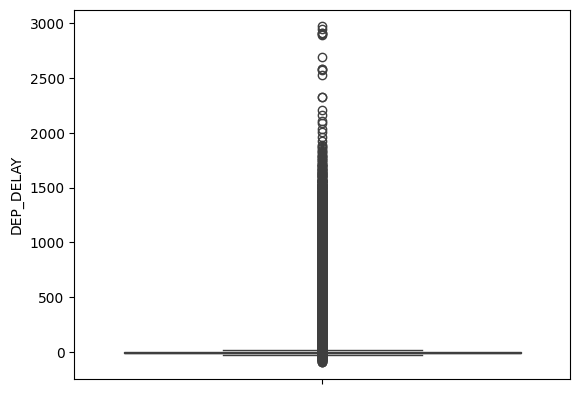

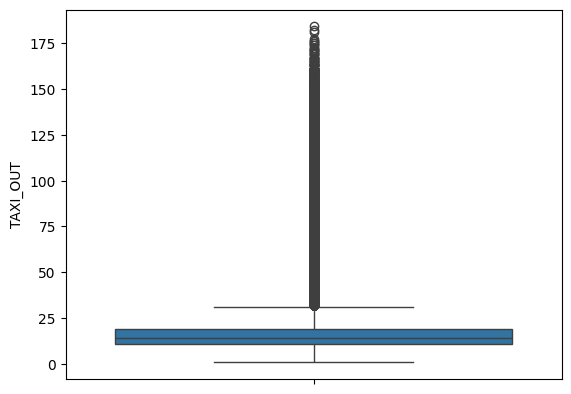

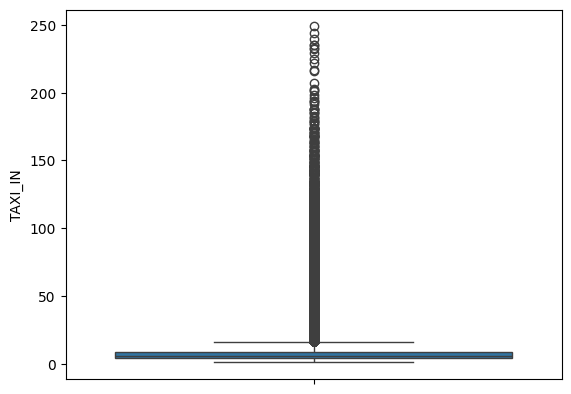

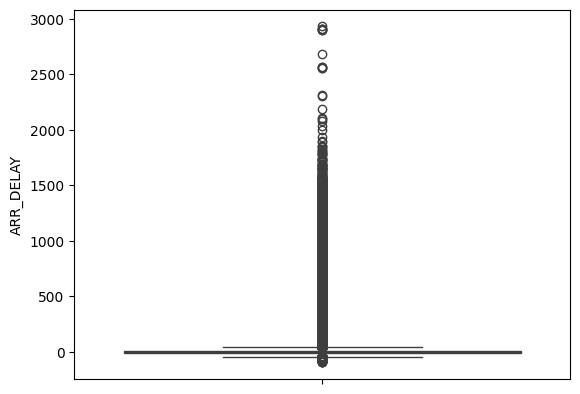

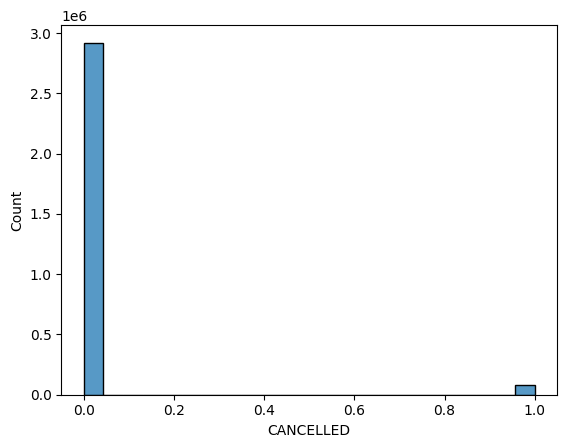

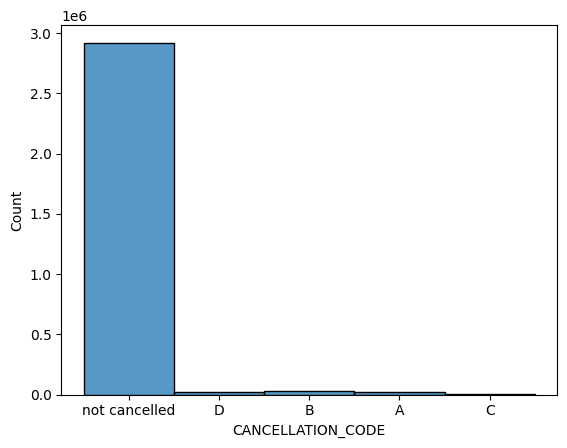

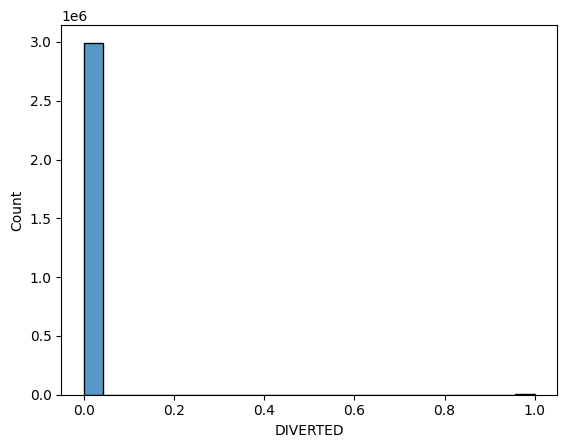

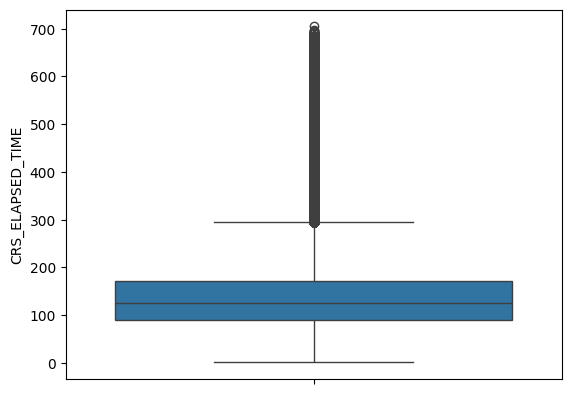

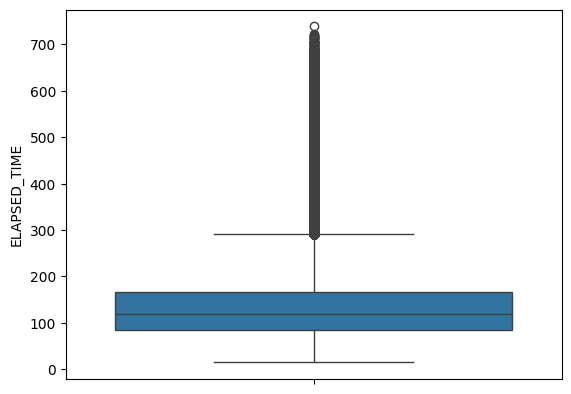

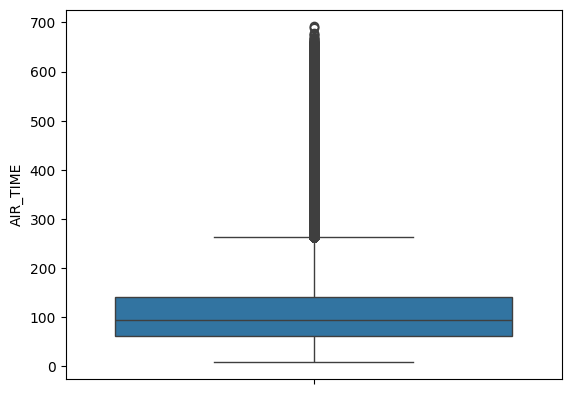

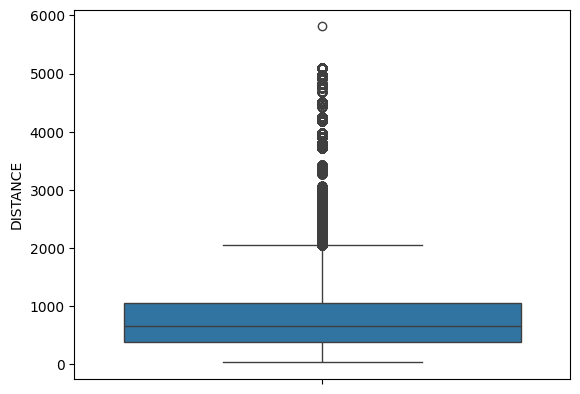

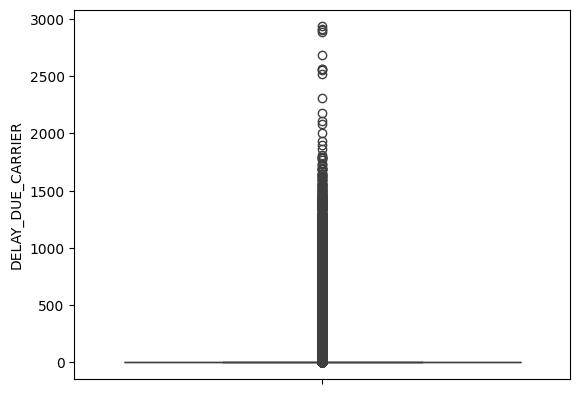

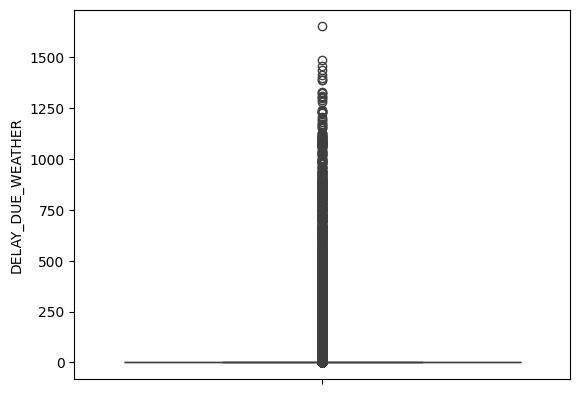

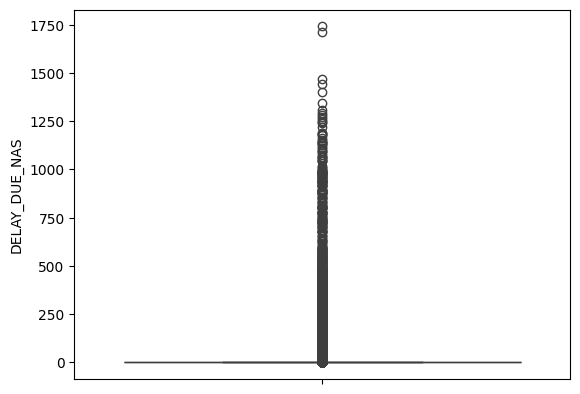

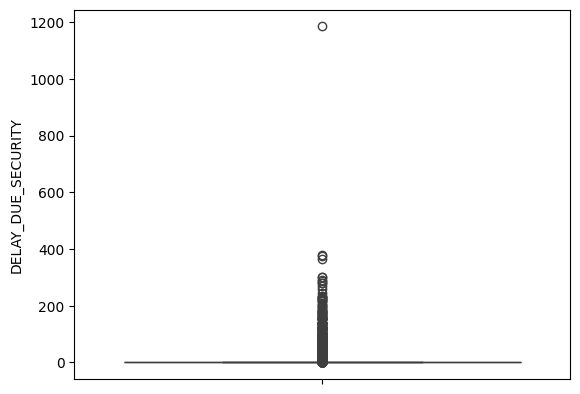

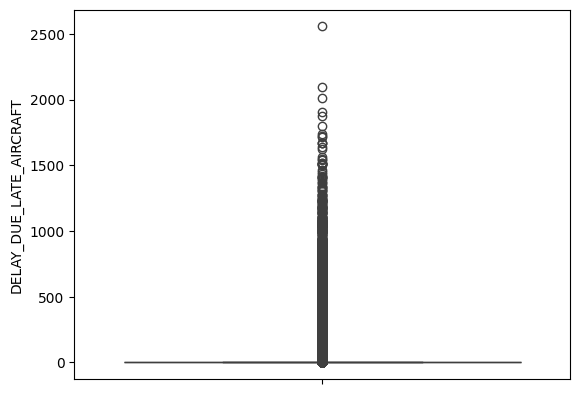

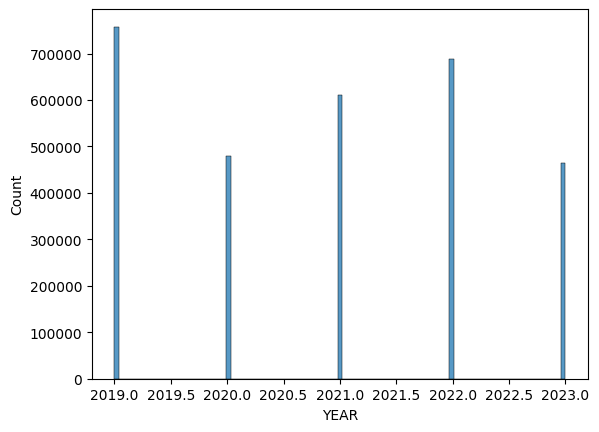

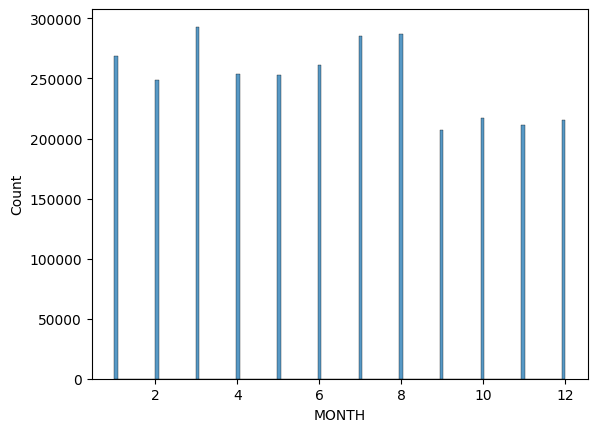

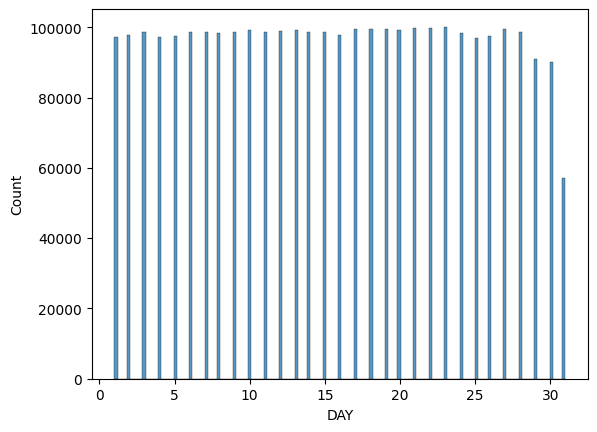

In [99]:
for col in cleaned_df.columns[6:]:
    if(col == "CANCELLED" or col == "DIVERTED" or col == "CANCELLATION_CODE" or col == "YEAR" or col == "MONTH" or col == "DAY"):
        sns.histplot(data=cleaned_df[col])
        plt.show()
    else:
        sns.boxplot(data=cleaned_df[col])
        plt.show()

In [98]:
df["CANCELLATION_CODE"].value_counts()

CANCELLATION_CODE
B    28772
D    24417
A    19476
C     6475
Name: count, dtype: int64